<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

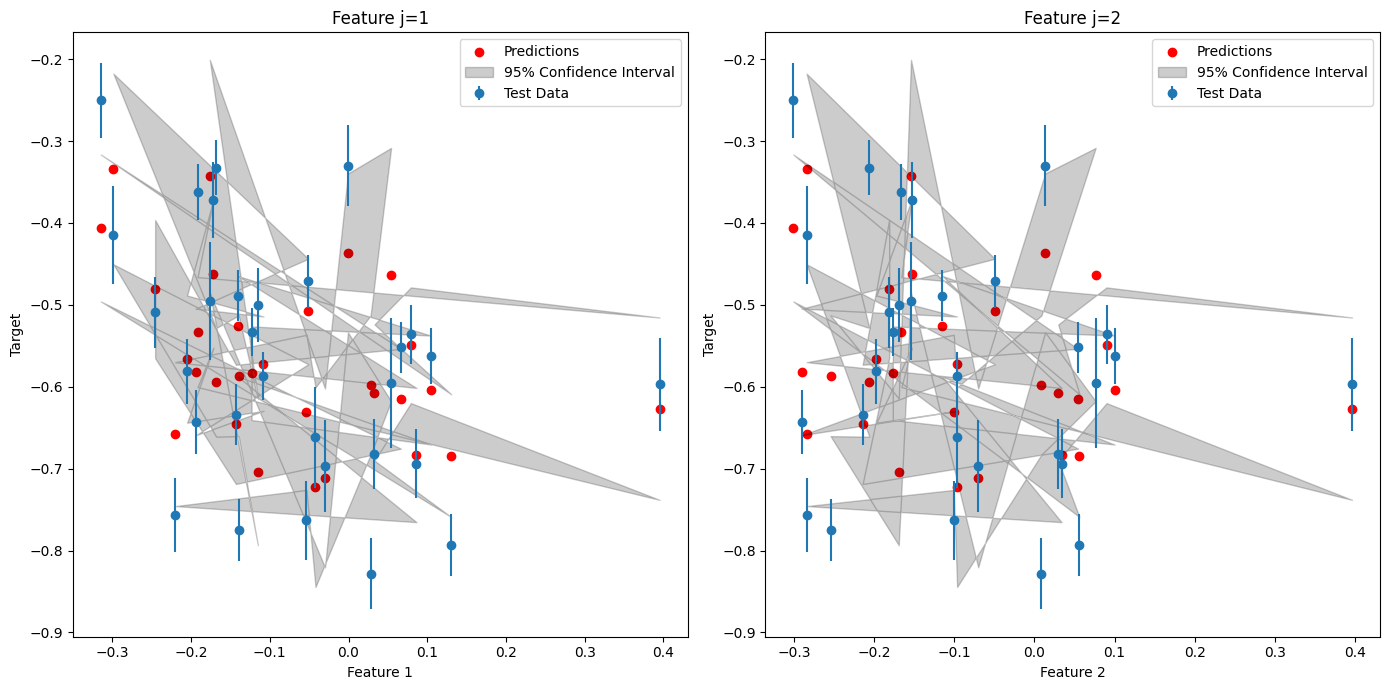

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import warnings

# Ignore future warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset from the provided GitHub link
df = pd.read_csv('https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/LibSVM-space_ga_scale.txt',
                 delim_whitespace=True, header=None)

# Separate target variable (first column) and features (remaining columns)
y = df.iloc[:, 0]    # Target variable
X = df.iloc[:, 1:]   # Features

# Split dataset into training (150 samples) and test (30 samples) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150, test_size=30)

# Define the Gaussian Process kernel function: ConstantKernel * RBF
# - ConstantKernel sets an initial magnitude for the function
# - RBF (Radial Basis Function) defines the smoothness of the predictions
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create and train the Gaussian Process Regressor (GPR)
# - n_restarts_optimizer=10: Runs the optimizer multiple times to improve hyperparameters
# - alpha=0.1: Adds slight noise to handle potential numerical instabilities
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
gpr.fit(X_train, y_train)

# Make predictions on the test set
# - y_pred: Mean predicted values
# - sigma: Standard deviation (uncertainty) of predictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Convert predictions into a DataFrame for easy visualization
test_results = pd.DataFrame({
    'Feature_1': X_test.iloc[:, 0],   # First feature for plotting
    'Feature_2': X_test.iloc[:, 1],   # Second feature for plotting
    'True_Values': y_test,            # Actual target values
    'Predicted_Values': y_pred,       # Predicted target values
    'Sigma': sigma                    # Prediction uncertainty
})

# Plot results for the first two features (j=1 and j=2)
plt.figure(figsize=(14, 7))  # Set figure size

# Plot for Feature j=1
plt.subplot(1, 2, 1)
plt.errorbar(test_results['Feature_1'], test_results['True_Values'],
             yerr=test_results['Sigma'], fmt='o', label='Test Data')  # Plot true values with error bars
plt.scatter(test_results['Feature_1'], test_results['Predicted_Values'],
            color='r', label='Predictions')  # Plot predicted values in red
plt.fill_between(test_results['Feature_1'],
                 test_results['Predicted_Values'] - 1.96 * test_results['Sigma'],
                 test_results['Predicted_Values'] + 1.96 * test_results['Sigma'],
                 alpha=0.2, color='k', label='95% Confidence Interval')  # Add shaded confidence interval
plt.title('Feature j=1')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()  # Display legend

# Plot for Feature j=2
plt.subplot(1, 2, 2)
plt.errorbar(test_results['Feature_2'], test_results['True_Values'],
             yerr=test_results['Sigma'], fmt='o', label='Test Data')  # Plot true values with error bars
plt.scatter(test_results['Feature_2'], test_results['Predicted_Values'],
            color='r', label='Predictions')  # Plot predicted values in red
plt.fill_between(test_results['Feature_2'],
                 test_results['Predicted_Values'] - 1.96 * test_results['Sigma'],
                 test_results['Predicted_Values'] + 1.96 * test_results['Sigma'],
                 alpha=0.2, color='k', label='95% Confidence Interval')  # Add shaded confidence interval
plt.title('Feature j=2')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot